In [2]:
import pandas as pd
X_train = pd.read_csv(r"/workspaces/clustering-knn-model/data/processed/X_train.csv")
X_test = pd.read_csv(r"/workspaces/clustering-knn-model/data/processed/X_test.csv")
X_train

,MedInc,Latitude,Longitude
0,3.3611,33.99,-118.06
1,3.6987,33.87,-118.19
2,2.6667,38.43,-122.75
3,2.5750,39.17,-122.90
4,3.2500,37.97,-122.03
...,...,...,...
16507,3.0687,33.94,-117.47
16508,1.8533,41.72,-122.65
16509,2.8833,39.31,-123.15
16510,1.6675,34.05,-117.30


In [3]:
X_test

,MedInc,Latitude,Longitude
0,4.1316,33.22,-117.24
1,4.9236,37.26,-121.94
2,3.3281,38.42,-121.37
3,2.7262,38.48,-121.44
4,4.7188,36.97,-122.13
...,...,...,...
4123,2.5202,38.24,-122.64
4124,1.4028,36.76,-119.82
4125,4.8036,37.39,-122.08
4126,2.2500,39.10,-122.33


In [4]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 6, random_state = 14)
model.fit(X_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=14)

In [5]:
y_train = model.labels_

In [6]:
type(y_train)

numpy.ndarray

In [7]:
y_test = model.predict(X_test)
y_test

array([5, 3, 1, ..., 3, 1, 1], dtype=int32)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred = knn_model.predict(X_train)
y_pred

array([4, 4, 1, ..., 1, 4, 1], dtype=int32)

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_pred)

0.9962451550387597

In [11]:
y_pred = knn_model.predict(X_test)

In [12]:
y_pred 

array([5, 3, 1, ..., 3, 1, 1], dtype=int32)

In [13]:
from sklearn.model_selection import ParameterGrid
best_accuracy = 0
best_combination = None

param_grid  = {
    "n_neighbors":[3,5,7],
    "weights": ["uniform","distance"],
    "algorithm": ["auto", "kd_tree", "brute"], 
    'metric':["euclidean","manhattan","cityblock","minkowski"]
    
}

for combination in ParameterGrid(param_grid):
    model = KNeighborsClassifier(**combination)
    print(model)
    model.fit(X_train, y_train)   
    y_pred = model.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    print("Combination:", combination)
    print("Accuracy:", acc)
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_combination = combination
        
print("Best Combination:", best_combination)
print("Best Accuracy:", best_accuracy)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)


Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.9969113372093024
KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 1.0
KNeighborsClassifier(metric='euclidean')
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.9962451550387597
KNeighborsClassifier(metric='euclidean', weights='distance')
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 1.0
KNeighborsClassifier(metric='euclidean', n_neighbors=7)
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.9955184108527132
KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')
Combination: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 7, 'weight

In [14]:
best_model = KNeighborsClassifier(**best_combination)
best_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [15]:
y_pred = best_model.predict(X_train)

In [16]:
accuracy_score(y_train, y_pred)

1.0

In [17]:
y_pred_test = best_model.predict(X_test)

In [18]:
y_pred_test

array([5, 3, 1, ..., 3, 1, 1], dtype=int32)

In [19]:
import pickle as pk
from pickle import dump, load
dump(best_model, open(r"/workspaces/clustering-knn-model/models/cluster_and_nkk_model.pk", "wb"))

In [20]:
accuracy_score(y_test, y_pred_test)

0.9907945736434108

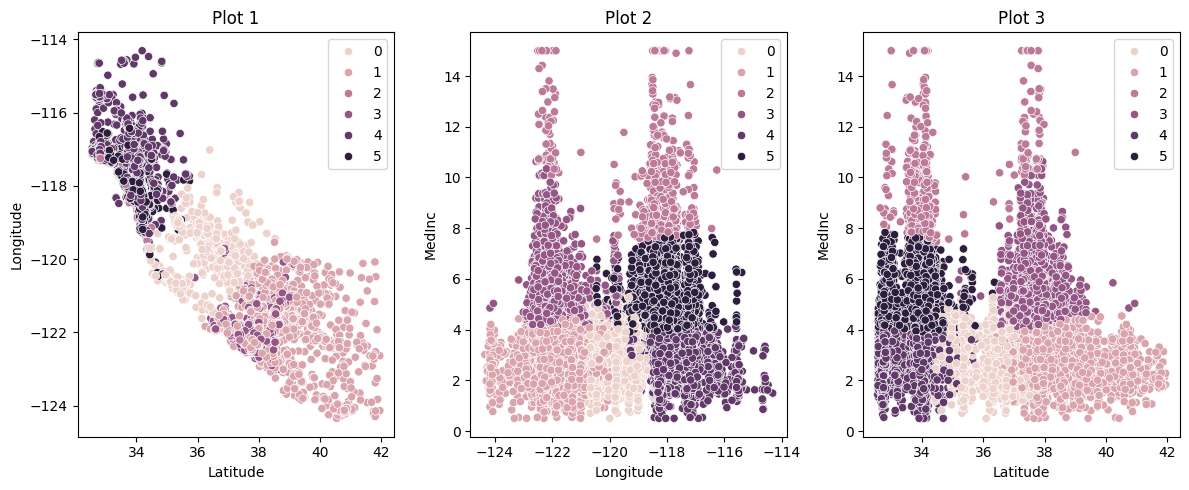

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear subgráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

sns.scatterplot(data=X_train, x=X_train['Latitude'], y=X_train['Longitude'], ax=axes[0], hue=y_train)
axes[0].set_title('Plot 1')


sns.scatterplot(data=X_train, x=X_train['Longitude'], y=X_train['MedInc'], ax=axes[1], hue=y_train)
axes[1].set_title('Plot 2')



sns.scatterplot(data=X_train, x=X_train['Latitude'], y=X_train['MedInc'], ax=axes[2], hue=y_train)
axes[2].set_title('Plot 3')

# Ajustar el diseño y mostrar los subgráficos
plt.tight_layout()
plt.show()


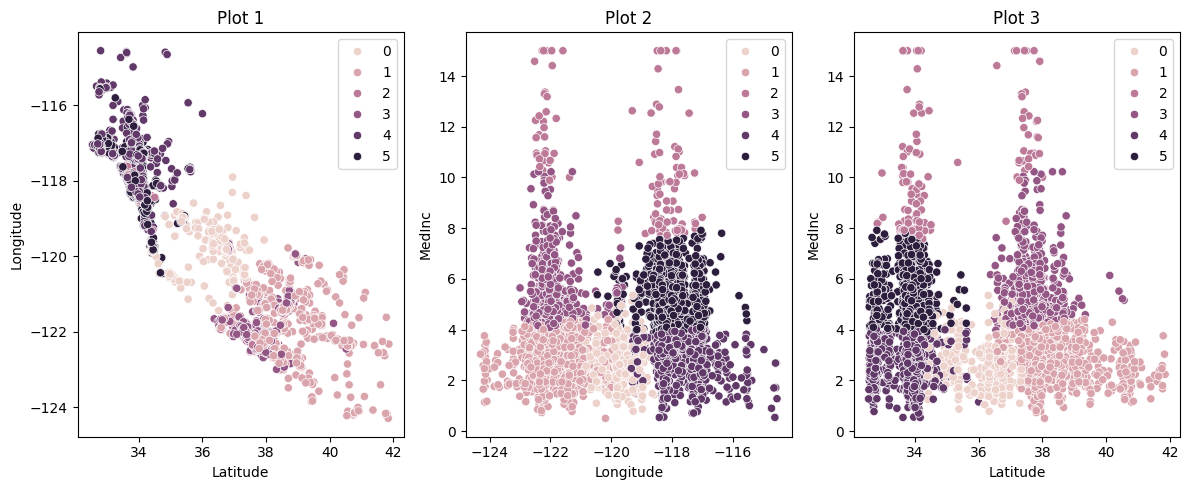

In [22]:
import matplotlib.pyplot as plt


# Crear subgráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

sns.scatterplot(data=X_test, x=X_test['Latitude'], y=X_test['Longitude'], ax=axes[0], hue=y_test)
axes[0].set_title('Plot 1')


sns.scatterplot(data=X_test, x=X_test['Longitude'], y=X_test['MedInc'], ax=axes[1], hue=y_test)
axes[1].set_title('Plot 2')



sns.scatterplot(data=X_test, x=X_test['Latitude'], y=X_test['MedInc'], ax=axes[2], hue=y_test)
axes[2].set_title('Plot 3')

# Ajustar el diseño y mostrar los subgráficos
plt.tight_layout()
plt.show()


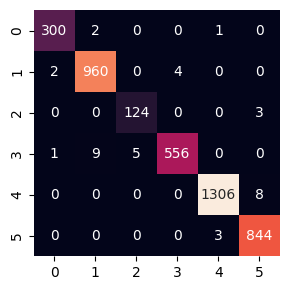

In [23]:
from sklearn.metrics import confusion_matrix

bank_cm = confusion_matrix(y_test, y_pred_test)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(bank_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

Considering the previous results we can assert that there are not significative differences between train and test

In [34]:
y_test = pd.DataFrame(y_test, columns=['values'])

<Axes: xlabel='values'>

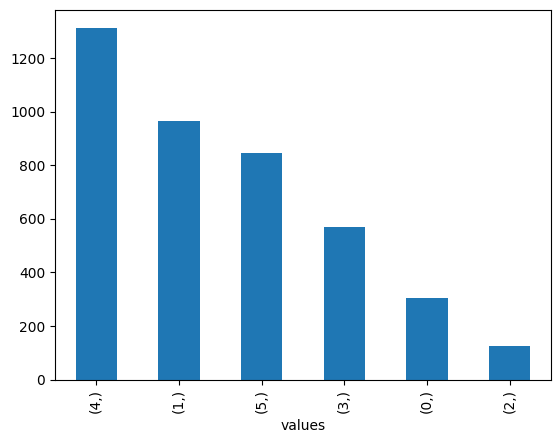

In [51]:
y_test.value_counts().plot(kind='bar')